# Questions I want to answer 
### 1.Was age a factor in surviving the Titanic?
### 2.Was gender a factor in surviving the Titanic?
### 3.Was SES/location on board the ship a factor for survival?
### 4.Were children more likely to survive?
### 5.Did people with family members on board have better or worse chances of survival compared to people who were traveling alone?

# Data Wrangling Phase
### 1.Data Acquisition 
### 2.Data cleanup
### 3.Checking for missing values

#### 1.Data Acquisition-The code below will import important libraries I will be using through this project and acquire the csv file which contains the titanic data. The .head() allows me to print the first few lines from the the dataset I have just acquired. 

In [57]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
titanic_data = pd.read_csv('titanic-data.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### 2.Data cleanup-The code below will drop all entries which have been duplicated in the dataset and are therefore, redundant. The drop_duplicates() functionality allows me to do that.

In [58]:
#Data cleanup-remove duplicate entries
titanic_data.drop_duplicates(subset=None, inplace=True)
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### 2.Data cleanup-The dataset has lot of columns such as 'PassengerId','Name','Ticket','Fare','Cabin',Embarked' that I will not be using for any of my analyses and thus want to get rid of these unwanted columns from my dataset. This would make my data a lot more readable, compact and concise. The code below using the drop() functionality allows me to do that.

In [59]:
#Data cleanup-removing unnecessary or unwanted columns
new_titanic = titanic_data.drop(['PassengerId','Name','Ticket','Fare','Cabin','Embarked'],axis=1)
new_titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


#### 3.Checking for any missing values-The code below uses the info() functionality that gives me a count of all non-null entries for each column. 

In [60]:
#checking for any missing values
new_titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 6 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
dtypes: float64(1), int64(4), object(1)
memory usage: 48.7+ KB


#### 714 out of 891 age entries are non-null which means 177 of them have to be missing values. These 177 NaN entries will be dropped from the dataset later on and consequently excluded from mean age calculations.

# Data Exploration  and Visualization Phase

#### I use the .describe() option to get an overview of the data using descriptive statistics for each of the columns in the dataframe.

In [61]:
#Overview of the data in the dataframe using descriptive statistics for each of the columns
new_titanic.describe()

,Survived,Pclass,Age,SibSp,Parch
count,891.000000,891.000000,714.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594
std,0.486592,0.836071,14.526497,1.102743,0.806057
min,0.000000,1.000000,0.420000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000
75%,1.000000,3.000000,38.000000,1.000000,0.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000


#### From the above output, we see that the mean age for all passengers was 29.7 years and that 50% of all passengers were between 0 and 28 years old. 75% of all passengers were 38 years or younger. We look at the age distribution a little more in detail below.

### Age Based Analysis
#### Here, we try and answer our first question and see if and how age affected survival on the Titanic.

#### The following code prints out a histogram plot showing the distribution of passenger ages. The Y axis of the graph has the frequency or count while the x-axis has the age intervals/bins. 

most passengers are between 18 and 35 years old and the ages look like they are normally distributed.


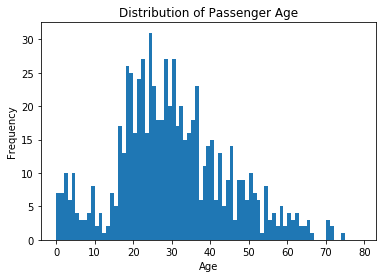

In [62]:
new_titanic['Age'].plot.hist(title="Distribution of Passenger Age", bins=range(0, 80, 1)).set_xlabel("Age")
print "most passengers are between 18 and 35 years old and the ages look like they are normally distributed."

#### The code below uses the dropna() functionality to drop all passenger entries that have missing ages. This makes our dataset cleaner and more reliable when performing age based mean calculations. The code then groups the dataset by the 'Survived' variable using the groupby() functionality. This allows us to print a histogram plot showing the age distribution of Non-Survivors in comparision to that of the survivors. The x-axis represents the age intervals while the y-axis has the frequency.

From the graph above and below, we can see that all passengers between 0 and 1 survived while most passengers above 63 did not. 


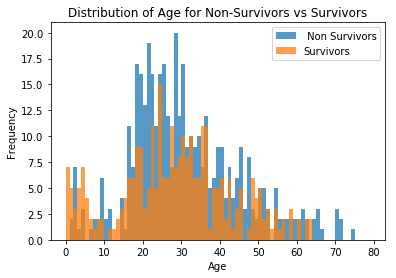

In [63]:
titanic_age = new_titanic.dropna()#Dropping passenger information for all those missing ages.
grouped_by_survival=titanic_age.groupby(['Survived'],as_index=False)
grouped_by_survival['Age'].plot.hist(title="Distribution of Age for Non-Survivors vs Survivors", bins=range(0, 80, 1),alpha=0.75)
plt.xlabel('Age')
plt.legend([" Non Survivors","Survivors"])

print "From the graph above and below, we can see that all passengers between 0 and 1 survived while most passengers above 63 did not. "

#### From the plot above we can see that the age distribution of the survivors is very similar to the age distribution of the non-survivors and age distribution of the passengers overall. We can also see that all passengers between 0 and 1 years of age survived. We also notice that most passengers above 63 years of age had a tough time surviving although there weren't a lot of passengers above that age.  

#### The code below uses the dataframe, grouped by survival, we created above and then finds the mean age of both the groups. We then print out a barplot comparing mean age of all survivors to that of the non-survivors. 

   Survived        Age
0         0  30.626179
1         1  28.343690


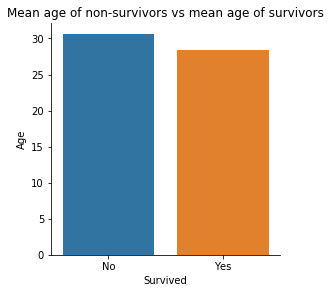

In [64]:
titanic_mean_age = grouped_by_survival['Age'].mean()
print titanic_mean_age
g1 = sns.factorplot(x='Survived',y='Age',data=titanic_mean_age,kind='bar')
g1.set_xticklabels(["No","Yes"])
plt.title("Mean age of non-survivors vs mean age of survivors")

#### The mean age for survivors is slightly lower than that of the non-survivors but apart from that there is not much evidence to support that age was a big factor for survival. The age distribution for both groups are almost identical and even similar to the general age distribution of the passengers.

### Sex based Analysis
#### Here, we try and answer our 2nd question and see if gender was a factor in survival.

#### We start off our gender based analysis by finding out the count of both male and female passengers. In the code below we divide the data into 2 groups based on sex and then use the count() functionality. We compare this visually by using a bar plot. 

Number of male passengers is 577
Number of female passengers is 314


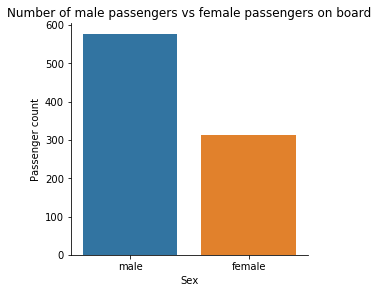

In [65]:
#Gender Based Analysis
male_passengers=new_titanic[new_titanic['Sex']=='male']
female_passengers=new_titanic[new_titanic['Sex']=='female']
num_males= male_passengers['Sex'].count()
num_females= female_passengers['Sex'].count()
print ("Number of male passengers is {}".format(num_males))
print ("Number of female passengers is {}".format(num_females))
graph_passengers=sns.factorplot('Sex', data=new_titanic, kind='count')
graph_passengers.set_ylabels("Passenger count")
plt.title("Number of male passengers vs female passengers on board")

#### The code below uses the drop() functionality again to reduce the dataset into columns we only need for this part of the analysis. I drop the 'SibSp','Parch' and the 'Age' columns. I then use the groupby() functionality to group the data by the variables 'Pclass','Survived' and 'Sex'. This creates a dataframe that gives me a count of all passengers seaparated into the different classes, grouped by survival and then sub-divided into male or female.'

In [66]:
titanic_sex=new_titanic.drop(['SibSp','Parch','Age'],axis=1)
grouped_by_css = titanic_sex.groupby(['Pclass','Survived','Sex']).size()
print grouped_by_css

Pclass  Survived  Sex   
1       0         female      3
                  male       77
        1         female     91
                  male       45
2       0         female      6
                  male       91
        1         female     70
                  male       17
3       0         female     72
                  male      300
        1         female     72
                  male       47
dtype: int64


#### In the code below we make 2 separate groups from the data, one with survivors and one with non-survivors. Then, we find out how many of the survivors were male and female using the len() functionality. After we have these counts, we calculate the survival percentage for both the groups and graph the survival rates.  

Number of male passengers who survived is 109
Number of female passengers who survived is 233
#Percentage of male passengers who survived was 18.8908145581 while the percentage of female passengers who survived was 74.2038216561


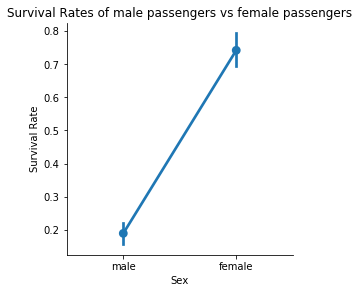

In [67]:
survived=new_titanic[new_titanic['Survived']==1]
didnt_survive=new_titanic[new_titanic['Survived']==0]
male_survivors = len(survived[survived['Sex']=='male'])
female_survivors = len(survived[survived['Sex']=='female'])
print "Number of male passengers who survived is {}".format(male_survivors)
print "Number of female passengers who survived is {}".format(female_survivors)
male_surv_perc = float(male_survivors*100.00/num_males)
female_surv_perc  = float(female_survivors*100.00/num_females)
print "#Percentage of male passengers who survived was {} while the percentage of female passengers who survived was {}".format(male_surv_perc,female_surv_perc)
graph=sns.factorplot("Sex","Survived",data=new_titanic)
graph.set_axis_labels("Sex","Survival Rate")
plt.title("Survival Rates of male passengers vs female passengers")

#### From the above results, we see a stark difference in the survival rates of male and female passengers. Women were about 4 times as likely as men to survive and therefore, we can say that gender was a factor for survival and it might be true that women were given preference on the lifeboats.

### Class based Analysis
#### Here we try and see if Social economic status(class) or location(deck) on board the ship played a role in survival.

#### In the code below, we first plot the passenger counts grouped by sex,survival and class. We then define a function that calculates the survival rate for a particular class. We call this function for each of the 3 classes-1st or the Upper, 2nd or the middle, and 3rd or the lower, and finally plot the survival rates from each class using a point graph. 

Proportion of class 1 passengers that survived is 0.62962962963
Proportion of class 2 passengers that survived is 0.472826086957
Proportion of class 3 passengers that survived is 0.242362525458


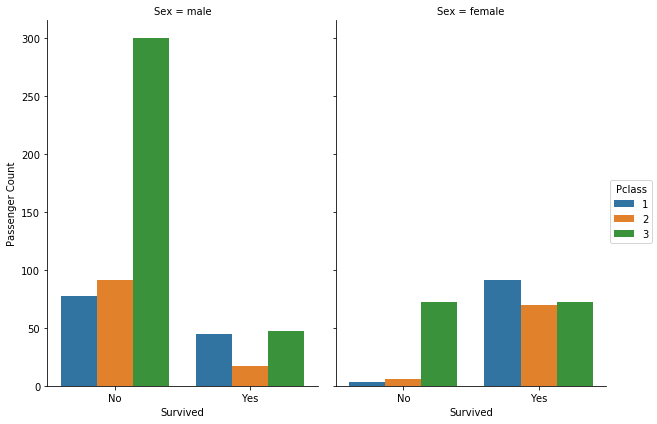

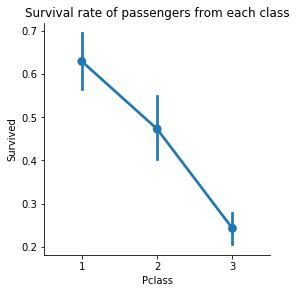

In [68]:
# Graph - Actual count of passengers by survival, group and sex
g2 = sns.factorplot('Survived', col='Sex', hue='Pclass', data=new_titanic, kind='count', size=6, aspect=.7)
g2.set_xticklabels(["No","Yes"])
g2.set_axis_labels("Survived","Passenger Count")
def find_prop(data,classno):
    """
    Returns the survival rate as a float for each Class(1,2 and 3 in this case) in the dataset.
    """
    tot_in_class = data[data['Pclass']==classno]
    surv_in_class  = tot_in_class[tot_in_class['Survived']==1]
    tot_no = (tot_in_class.count(numeric_only=True)['Pclass']).astype(float)
    surv_no = (surv_in_class.count(numeric_only=True)['Pclass']).astype(float)
    return surv_no/tot_no

print ("Proportion of class 1 passengers that survived is {}".format(find_prop(new_titanic,1)))
print ("Proportion of class 2 passengers that survived is {}".format(find_prop(new_titanic,2)))
print ("Proportion of class 3 passengers that survived is {}".format(find_prop(new_titanic,3)))

#graphing overall survival rates from each class
sns.factorplot("Pclass","Survived",order=[1,2,3],data=new_titanic)
plt.title("Survival rate of passengers from each class")

#### From the above findings, we can say that class did play as a factor in survival. Passengers in class 1 had the best chance of survival of 0.63, followed by class 2 with 0.47 and finally class 3 with 0.24.People in class 2 were about 2 times as likely as people in class 3 to survive. People in class 1 were about 2.5 times as likely as people in class 3 to survive.Class 1 was the top deck on the ship, class 2 being the middle deck and finally class 3 being the bottom deck. I feel the location played a big role in survival as the lifeboats were easily accessible for passengers on the top level while the bottom deck(class 3) was the first to go under water and hence made survival challenging. The passengers' socio-economic status was indirectly responsible for their survival. Class 1 tickets were the most expensive, followed by class 2 and 3. In hindsight, these classes were also the safest in the same order.  

### Children Survival vs the rest
#### Here we try and answer our 4th question and find out if children were more likely to survive than men or women.

#### First of all, we define children to be less than 16 years old. This is because the 1908 Children's Act in the UK allowed people 16 or above to have legal custody of other children and anyone 16 or above could be punished for negligence of a child. This was also the age of consent and the age you could bequeath personal property,etc. In the code below, we group all passengers below 16 and then within that group, find everyone who has survived. This allows us to calulate the survival rate amongst children. 

In [69]:
#Defining children as everyone below 16 years of age.
titanic_children = titanic_age[titanic_age['Age']<16]
children_surv = titanic_children[titanic_children['Survived']==1]
print "Number of passengers who can be defined as children:{}".format(len(titanic_children))
print "Number of children who survived:{}".format(len(children_surv))
children_surv_perc = float((len(children_surv)*100.00)/float(len(titanic_children)))
print "Percentage of children that survived the Titanic:{}".format(children_surv_perc)

Number of passengers who can be defined as children:83
Number of children who survived:49
Percentage of children that survived the Titanic:59.0361445783


#### In accordance with our definition of a child, we find that 83 passengers from the dataset could be classfied as children, 49 of whom survived, giving us a survival rate of 59%. It is important to note here that if I had declared children differently, I would have yielded different results.

#### In the code below we define a func age_sex() that returns whether a passenger was a 'Child','Male' or 'Female'. Using the apply() functionality, we create a column that stores the value 'age_sex()' returns, and finally use a barplot to show survival rates amongst the 3 groups. 

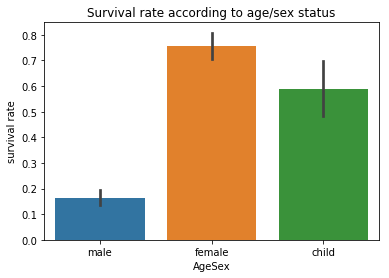

In [70]:
def age_sex(obs):
    """
    For all passengers younger than 16, returns "child".
    For all other passengers, returns `Sex` value.
    """
    if obs['Age'] < 16:
        return 'child'
    else:
        return obs['Sex']

titanic_data['AgeSex'] = titanic_data.apply(age_sex, axis=1)
sns.barplot(data=titanic_data, x='AgeSex', y='Survived');
plt.title("Survival rate according to age/sex status")
plt.ylabel("survival rate");

#### From the above results, we can say that children had a higher rate of survival than men but a lower rate of survival than women. More specifically, children had a survival rate a little more than about 3.5 times that of men. On the other hand, women were about 4.5 times as likely to survive than men. We can assume that women and children were given priority on the lifeboats. It is interesting to note that the survival rate of about 19% for male passengers that we calculated above seems to have gone down even lower when we exclude the male children from that group. 

### Survival Rates between people traveling alone vs people traveling along with family members
#### Here we try and answer our last question comparing passengers with family members on board to passengers who were travelling alone.

#### The code below adds the 'Parch' and 'SibSp' column values to find the number of family members the passenger is traveling with, declared as 'family_members', and using that we come up with 2 groups. One group has 0 family members while the other one has at least 1. Using the len() functionality, we then find the total number of passengers within each group and visually represent this using a barplot. 

Number of passengers traveling with atleast 1 family member:354
Number of passengers traveling alone:537


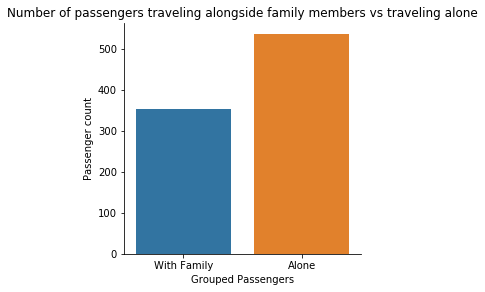

In [71]:
#Finding survival rates between people traveling alone vs people traveling along with family members
with_family = 0
alone = 0
new_titanic['family_members']=new_titanic['Parch']+new_titanic['SibSp']
with_family = new_titanic[new_titanic['family_members']!=0]
alone = new_titanic[new_titanic['family_members']==0]
print "Number of passengers traveling with atleast 1 family member:{}".format(len(with_family))
print "Number of passengers traveling alone:{}".format(len(alone))
new_titanic['family_members'].loc[new_titanic['family_members'] > 0]='With Family'
new_titanic['family_members'].loc[new_titanic['family_members']==0]='Alone'
gra = sns.factorplot(x="family_members",data=new_titanic,kind="count")
gra.set_axis_labels("Grouped Passengers","Passenger count")
plt.title("Number of passengers traveling alongside family members vs traveling alone")

#### From the output above, we see that there are 537 passengers traveling alone while 354 passengers are traveling with some sort of family.

#### I created a dataframe below using the groupby() functionality and the variables 'Survived' and "family_members" declared above.Once I have the counts for each of the 4 possibilities-'with_family and survived', 'with family and did not survive', 'alone and survived', and 'alone and did not survive', I find the survival rate for the 'Alone' and 'With_Family' groups. I use a point survival rate plot to show the same.

family_members  Survived
Alone           0           374
                1           163
With Family     0           175
                1           179
dtype: int64
Survival rate of passengers traveling alone:0.303538175047
Survival rate of passengers with family:0.505649717514


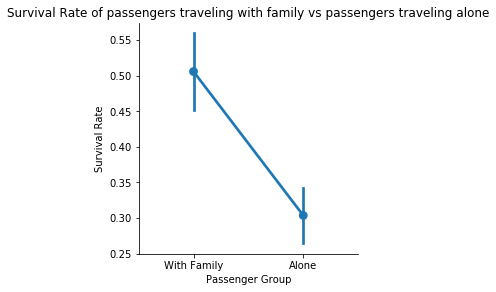

In [72]:
family_group=new_titanic.groupby(["family_members","Survived"]).size()
print family_group
traveling_alone = new_titanic[new_titanic['family_members']=='Alone']
traveling_family = new_titanic[new_titanic['family_members']=='With Family']
surv_alone = traveling_alone[traveling_alone['Survived']==1]
surv_family = traveling_family[traveling_family['Survived']==1]
alone_rate = float(surv_alone['family_members'].count())/float(traveling_alone['family_members'].count())
family_rate = float(surv_family['family_members'].count())/float(traveling_family['family_members'].count())
print "Survival rate of passengers traveling alone:{}".format(alone_rate)
print "Survival rate of passengers with family:{}".format(family_rate)
grap=sns.factorplot("family_members","Survived",data=new_titanic)
grap.set_axis_labels("Passenger Group","Survival Rate")
plt.title("Survival Rate of passengers traveling with family vs passengers traveling alone")

#### From the above analysis results, it appears that passengers who traveled with atleast 1 family member had better survival rates of about 50% than passengers who traveled alone who had about 30% chances of survival . This data might be affected because a lot of male passengers traveled alone and as male passengers had a low survival rate themselves, that could be confounding factor in this "Alone" group's survival rate as well.

# Conclusion

### From our preliminary analysis, we can tentatively say that sex was a factor for survival while age was not. Socio-economic status (SES) did seem to correlate with survival rates as well. Upper class passengers had the highest survival chances while lower class passengers had the worst. SES was responsible for which class tickets the passengers could afford but I think that location is a more direct explanation for the survival differences among the different classes. The 1st, or upper class, location is the upper deck, which was obviously the last to go under water and one that could easily access lifeboats. The 3rd/lower class location is the lowest deck and the first deck to go under water and thus, gave the passengers the least time to make it out and survive. I could have used cabin variable to find more specific location based analyses but chose not to do this because the cabin variable had lot of missing entries. 

### Children also had higher survival rates than adult men but lower than that of women. A possible explanation for that was the prioritization of women and children on the lifeboats. Our data analysis also showed that passengers who were traveling with at least 1 family member had better chances of survival compared to those who were alone. A lot of male passengers traveled alone; as we found out earlier, male passengers had really low rates of survival. This could be a confounding factor behind the "alone" group having lower survival rates than the "with family" group.

### Age didn't play a big factor in survival but 177 passengers were missing their ages and had to be excluded from the analysis. So this could change if we had all of the data. Apart from that, the dataset we are working with had infomation from only 891 passengers from a total of 2224 people on board the Titanic. If we had all of that information, some of these analyses could definitely lead to different results.  None of the analyses we did is enough to establish causation so all our inferences are tentative and some of these could possibly change after more in-depth analyses. We could perform significance tests using null and alternative hypotheses to find conclusions at a pre-set confidence level. This wouldn't allow us to be 100% sure or definitive in our conclusions but we could be 90% or 95% or 99% confident at finding statistically significant results.